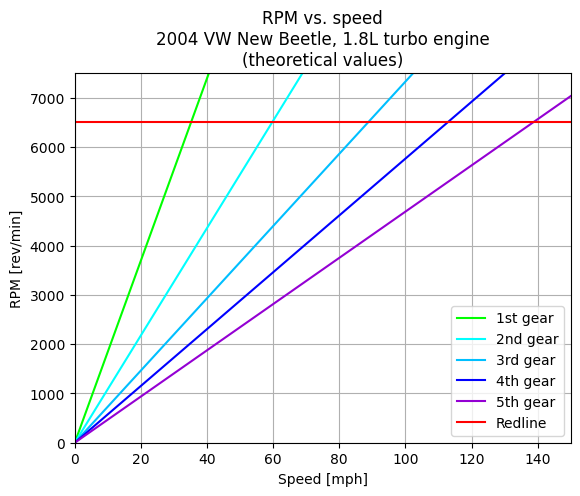

In [67]:
from enum import Enum
import matplotlib.pyplot as plt
import numpy as np
import math

"""
Constant definitions.
Constants are indicated as UPPERCASE.
"""

# Gear ratios of the Beetle. Dimensionless.
GEAR_RATIO_1 = 3.300
GEAR_RATIO_2 = 1.944
GEAR_RATIO_3 = 1.308
GEAR_RATIO_4 = 1.029
GEAR_RATIO_5 = 0.837
FINAL_DRIVE_RATIO = 3.938

MIN_SPEED_MPH = 0 # MPH
# Top speed of the Beetle.
MAX_SPEED_MPH = 150 # MPH

# Redline and max RPM.
REDLINE_RPM = 6500 # RPM
MIN_RPM = 0 # RPM
MAX_RPM = 7500 # RPM

# Tire size of the Beetle.
FRONT_LEFT_TIRE_DIAMETER = 23.75 # in
FRONT_RIGHT_TIRE_DIAMETER = 23.5 # in
AVERAGE_FRONT_TIRE_DIAMETER = (FRONT_LEFT_TIRE_DIAMETER + FRONT_RIGHT_TIRE_DIAMETER)/2.0

# Unit conversion factors.
FT_PER_MI = 5280 # ft/mi
IN_PER_FT = 12 # in/ft
MIN_PER_HR = 60 # min/hr

# Overall tolerance (applied on computed gear ratio).
TOLERANCE_COMPUTED_GEAR_RATIO = 0.05; # %

# Represents the slope of the speed vs. RPM graph, when multiplied by the current gear ratio.
SLOPE = (FINAL_DRIVE_RATIO * FT_PER_MI * IN_PER_FT)/(AVERAGE_FRONT_TIRE_DIAMETER * math.pi * MIN_PER_HR)

# For plotting tolerance boundaries.
ALPHA = 0.5

class PLOT_MODE(Enum):
    NORMAL=1
    OVERALL_TOLERANCE=2

"""
Plotting: change this enum to toggle different ploting modes.
"""

# Change this to toggle different plotting modes.
plot_mode = PLOT_MODE.NORMAL

# speed values for generating the x values of the plot.
speed_mph = np.linspace(MIN_SPEED_MPH, MAX_SPEED_MPH, num=5, endpoint=True)

rpm_1 = speed_mph * SLOPE * GEAR_RATIO_1
rpm_2 = speed_mph * SLOPE * GEAR_RATIO_2
rpm_3 = speed_mph * SLOPE * GEAR_RATIO_3
rpm_4 = speed_mph * SLOPE * GEAR_RATIO_4
rpm_5 = speed_mph * SLOPE * GEAR_RATIO_5

# Redline RPM
redline_values = np.full(len(speed_mph), REDLINE_RPM)

# Plot each curve.
# I define colors here so as not to get color overlap with the redline curve, which I wanted to be red
plt.plot(speed_mph, rpm_1, label="1st gear", color='lime')
plt.plot(speed_mph, rpm_2, label="2nd gear", color='cyan')
plt.plot(speed_mph, rpm_3, label="3rd gear", color='deepskyblue')
plt.plot(speed_mph, rpm_4, label="4th gear", color='blue')
plt.plot(speed_mph, rpm_5, label="5th gear", color='darkviolet')
plt.plot(speed_mph, redline_values, label="Redline", color='red')


match plot_mode:
    case PLOT_MODE.NORMAL:
        titletext = "RPM vs. speed\n2004 VW New Beetle, 1.8L turbo engine\n(theoretical values)"

    case PLOT_MODE.OVERALL_TOLERANCE:
        rpm_ot_1_upper = speed_mph * SLOPE * GEAR_RATIO_1*(1+TOLERANCE)
        rpm_ot_1_lower = speed_mph * SLOPE * GEAR_RATIO_1*(1-TOLERANCE)
        plt.fill_between(speed_mph, rpm_ot_1_lower, rpm_ot_1_upper, facecolor='lime', edgecolor=None, alpha=ALPHA)
        
        rpm_ot_2_upper = speed_mph * SLOPE * GEAR_RATIO_2*(1+TOLERANCE)
        rpm_ot_2_lower = speed_mph * SLOPE * GEAR_RATIO_2*(1-TOLERANCE)
        plt.fill_between(speed_mph, rpm_ot_2_lower, rpm_ot_2_upper, facecolor='cyan', edgecolor=None, alpha=ALPHA)

        rpm_ot_3_upper = speed_mph * SLOPE * GEAR_RATIO_3*(1+TOLERANCE)
        rpm_ot_3_lower = speed_mph * SLOPE * GEAR_RATIO_3*(1-TOLERANCE)
        plt.fill_between(speed_mph, rpm_ot_3_lower, rpm_ot_3_upper, facecolor='deepskyblue', edgecolor=None, alpha=ALPHA)

        rpm_ot_4_upper = speed_mph * SLOPE * GEAR_RATIO_4*(1+TOLERANCE)
        rpm_ot_4_lower = speed_mph * SLOPE * GEAR_RATIO_4*(1-TOLERANCE)
        plt.fill_between(speed_mph, rpm_ot_4_lower, rpm_ot_4_upper, facecolor='blue', edgecolor=None, alpha=ALPHA)

        rpm_ot_5_upper = speed_mph * SLOPE * GEAR_RATIO_5*(1+TOLERANCE)
        rpm_ot_5_lower = speed_mph * SLOPE * GEAR_RATIO_5*(1-TOLERANCE)
        plt.fill_between(speed_mph, rpm_ot_5_lower, rpm_ot_5_upper, facecolor='darkviolet', edgecolor=None, alpha=ALPHA)

        titletext = "RPM vs. speed\n2004 VW New Beetle, 1.8L turbo engine\n(theoretical values, %d%% Overall Tolerance Method)" % int(TOLERANCE*100)

# Add title, labels, legends, and gridlines
plt.xlabel("Speed [mph]")
plt.ylabel("RPM [rev/min]")
plt.xlim(MIN_SPEED_MPH, MAX_SPEED_MPH)
plt.ylim(MIN_RPM, MAX_RPM)
plt.title(titletext)
plt.legend(loc='lower right')
plt.grid()
plt.show()